In [1]:
import gempy as gp
import gempy_viewer as gpv
from gempy_engine.core.data.stack_relation_type import StackRelationType

Setting Backend To: AvailableBackends.numpy


In [3]:
# Crear modelo geológico
geo_model = gp.create_geomodel(
    project_name='erosion_example',
    extent=[0, 1000, 0, 1000, 0, 1000],
    refinement=6,
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations="input_data/erosion_orientations.csv",
        path_to_surface_points="input_data/erosion_surface_points.csv"
    )
)

# Mapear las series geológicas a las superficies
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object={
        "Base_Series": ('rock1', 'rock2'),
        "Erosion_Series": 'rock3'
    }
)

# Establecer la relación estructural para que la serie superior erosione las inferiores
geo_model.structural_frame.structural_groups[0].structural_relation = StackRelationType.ERODE

# Computar el modelo
gp.compute_model(geo_model)



Setting Backend To: AvailableBackends.numpy
Chunking done: 8 chunks
Chunking done: 8 chunks


Solutions(6 Octree Levels, 3 DualContouringMeshes)

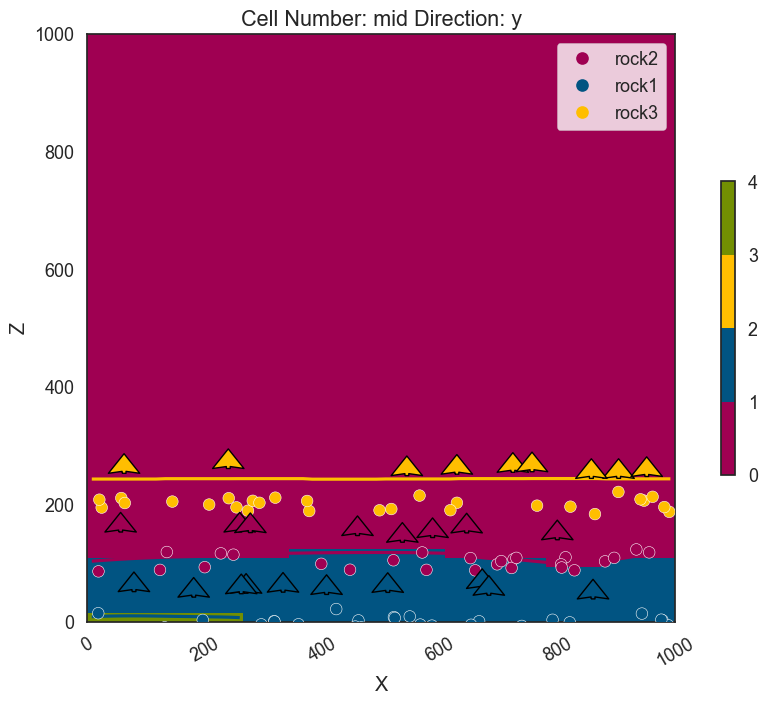

In [9]:
# Visualizar el resultado en 2D
gpv.plot_2d(geo_model, direction='y', show_data=True)

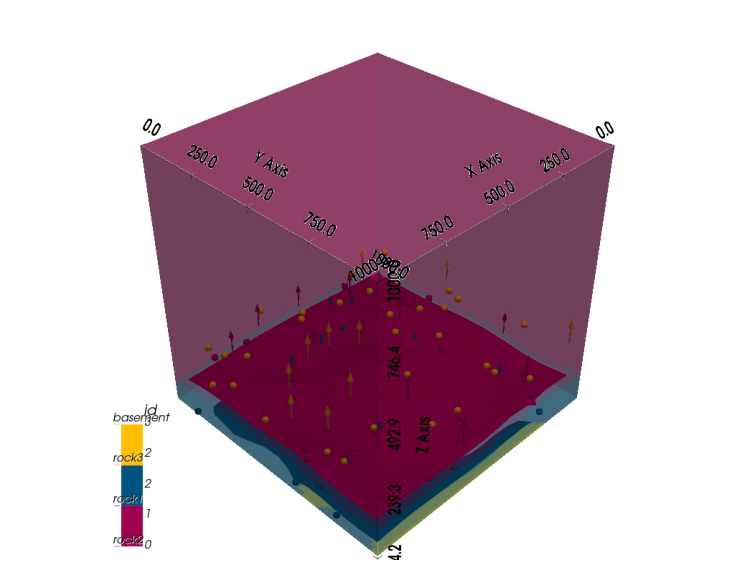

In [11]:
gpv.plot_3d(geo_model,image=True)